In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('spamhamteks.csv')
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [39]:
x = df['message'].values
y = df['label'].values


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)   # split train-test

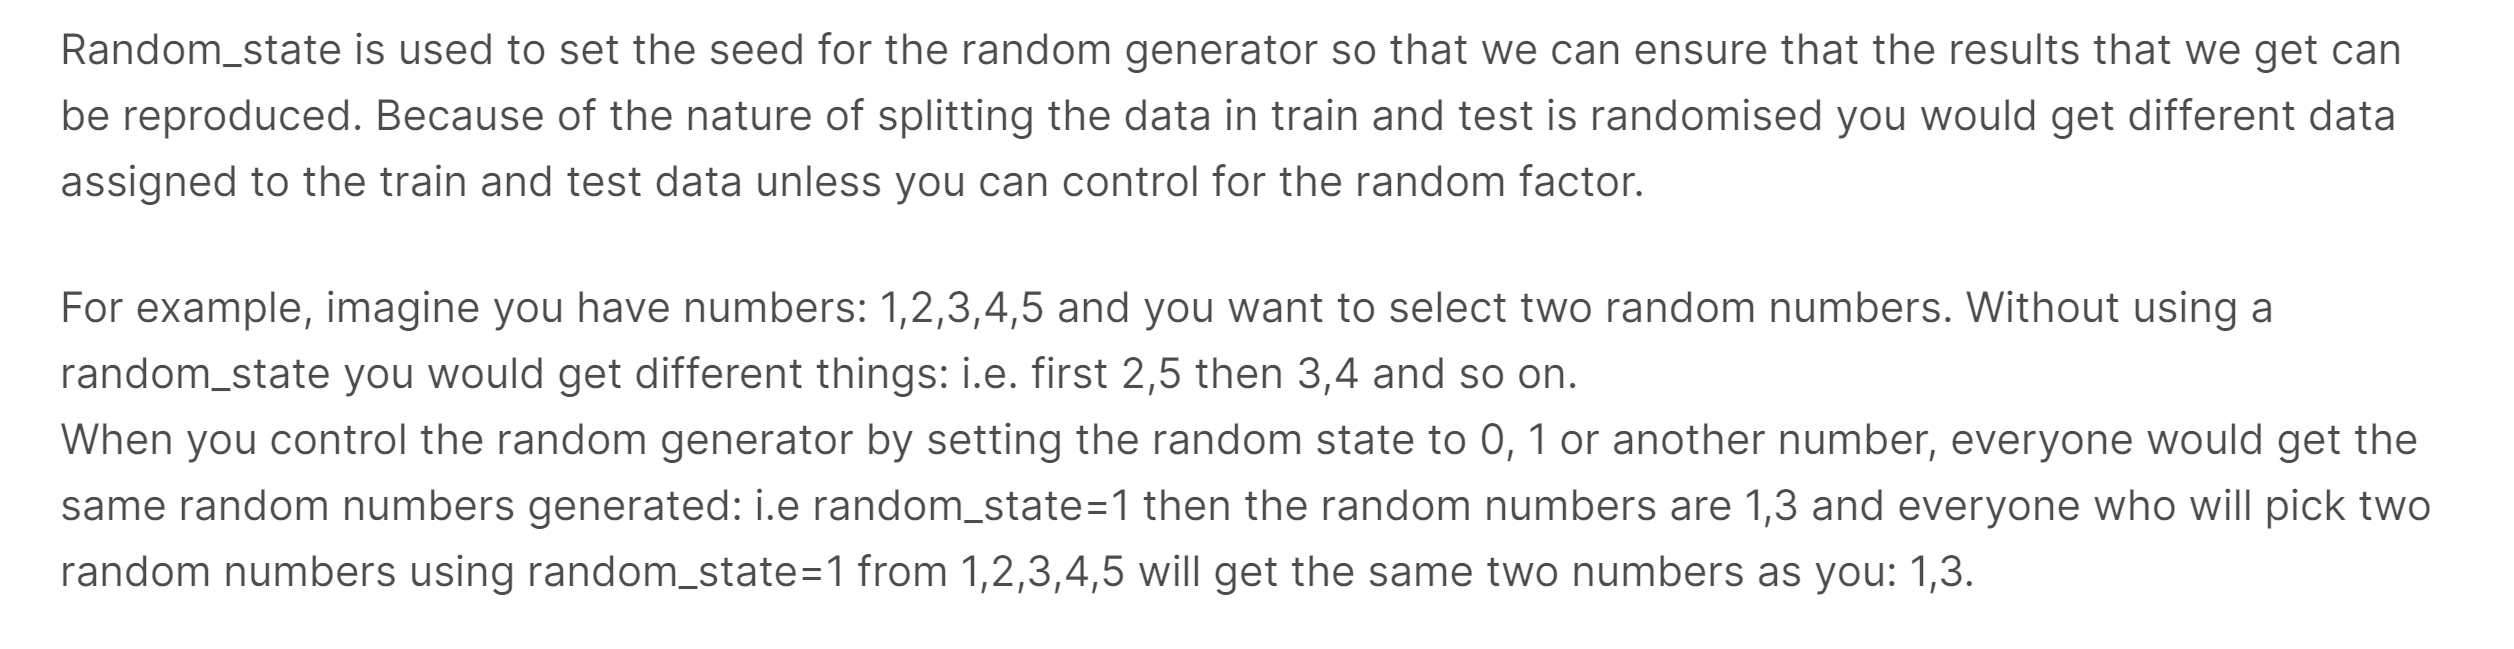

CountVectorizer

Untuk menggunakan data tekstual untuk pemodelan prediktif, teks harus diurai untuk menghapus kata-kata tertentu - proses ini disebut tokenisasi . Kata-kata ini kemudian perlu dienkode sebagai bilangan bulat, atau nilai floating-point, untuk digunakan sebagai masukan dalam algoritme pembelajaran mesin. Proses ini disebut ekstraksi fitur (atau vektorisasi) .


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [42]:
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [43]:
X_test


<1673x7119 sparse matrix of type '<class 'numpy.int64'>'
	with 21006 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()   # pilih algoritma ML --> logreg
classifier.fit(X_train, y_train)    # latih model (training): fase ini, model belajar dari data yg diberikan
score = classifier.score(X_test, y_test)

In [45]:
score     # menentukan akurasi

0.9838613269575612

Yeeyyy .. kita berhasil membuat model machine learning dengan menggunakan algoritma Regresi Logistik dengan nilai score 0.9838613269575612, dengan bana variabel classifier.


# Prediksi

In [46]:
# kita punya konten teks seperti berikut
teks_test2 = np.array(['This is the 2nd time we have tried to contact u. U have won the £400 prize. 2 claim is easy, just call 087104711148 NOW! Only 10p per minute. BT-national-rate'])
teks_test2


array(['This is the 2nd time we have tried to contact u. U have won the £400 prize. 2 claim is easy, just call 087104711148 NOW! Only 10p per minute. BT-national-rate'],
      dtype='<U158')

In [47]:
teks_vectorized2 = vectorizer.transform(teks_test2)
teks_vectorized2


<1x7119 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [48]:
predict = classifier.predict(teks_vectorized2)
predict


array(['spam'], dtype=object)

 - Hasil prediksi konten: Spam

In [49]:
# kita punya konten teks seperti berikut
teks_test3 = np.array(['If u wanna be such a success man, just study hard. Set your goal, learning from mentor n follow the process. And the important thing is to keep praying to get best luck'])
teks_test3

teks_vectorized3 = vectorizer.transform(teks_test3)
teks_vectorized3

predict = classifier.predict(teks_vectorized3)
predict


array(['ham'], dtype=object)

* hasil prediksi konten: BUKAN Spam